# Applied Machine Learning- Part 2: Supervised learning Regression
## Linear Regression: Ridge, Lasso, and Polynomial Regression
### K-nearest neighbors sample

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification

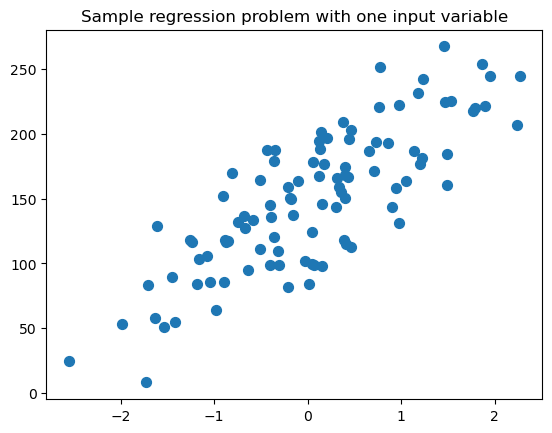

In [9]:
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples=100, n_features=1, n_informative=1, bias=150, noise=30, random_state=0)
plt.scatter(X_R1, y_R1, marker='o', s=50)
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsRegressor

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)
knnreg = KNeighborsRegressor(n_neighbors=6)
knnreg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [12]:
knnreg.score(X_test, y_test)

0.5230135819102928

C:\Users\sajad\AppData\Local\Temp\ipykernel_9828\2373253283.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1)
C:\Users\sajad\AppData\Local\Temp\ipykernel_9828\2373253283.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1)
C:\Users\sajad\AppData\Local\Temp\ipykernel_9828\2373253283.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1)
C:\Users\sajad\AppData\Local\Temp\ipykernel_9828\2373253283.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1)


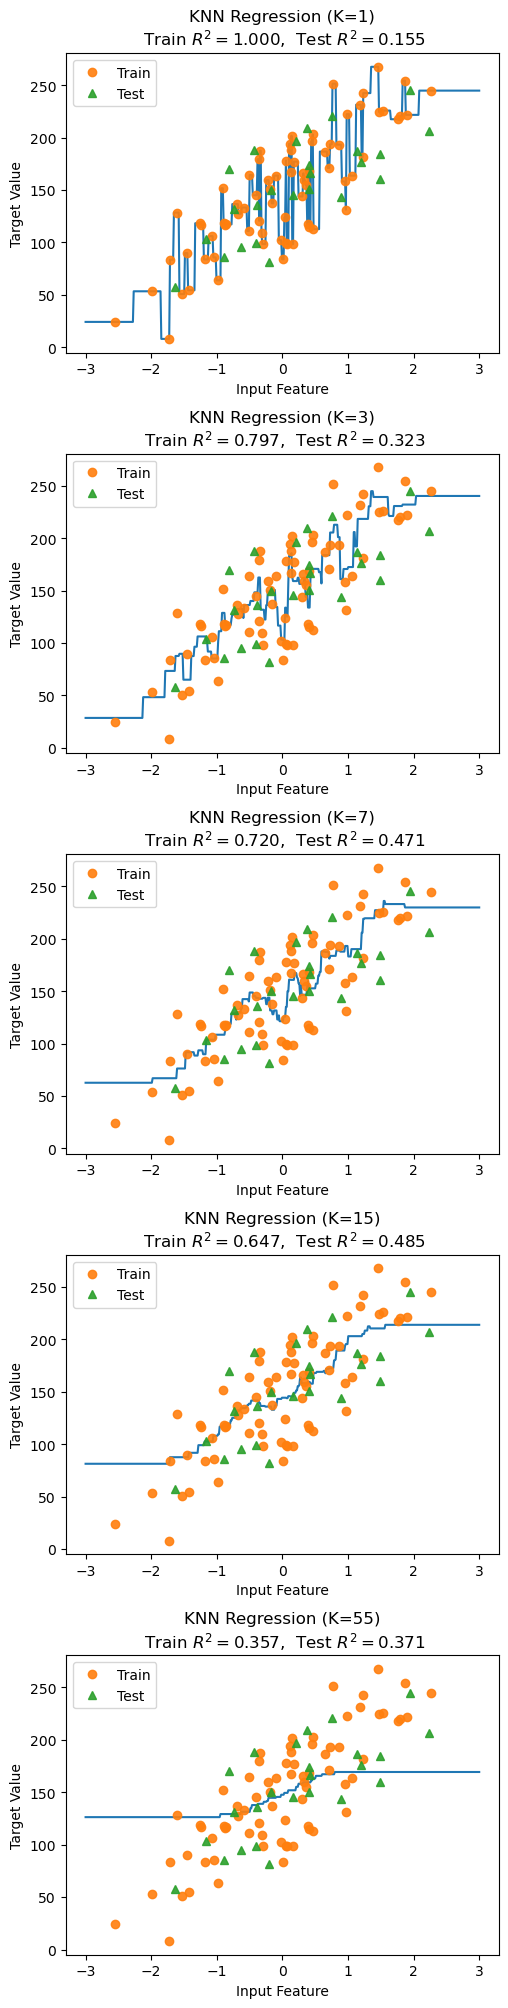

In [13]:
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict = np.linspace(-3, 3, 500).reshape(-1,1)

for thisaxis, K in zip(subaxes, [1,3,7,15,55]):
    knnreg = KNeighborsRegressor(n_neighbors= K).fit(X_train, y_train)
    y_predict = knnreg.predict(X_predict)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict, y_predict)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input Feature')
    thisaxis.set_ylabel('Target Value')
    thisaxis.set_title('KNN Regression (K={})\n Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1)

## Least Squared Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# Least Squares Linear Regression model
linreg = LinearRegression().fit(X_train, y_train)

In [16]:
print('linear model intercept (b): {}'.format(linreg.intercept_))
print('linear model coeff (w): {}'.format(linreg.coef_))

linear model intercept (b): 148.44575345658873
linear model coeff (w): [45.70870465]


In [17]:
y_predict = linreg.predict(X_predict)
train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)

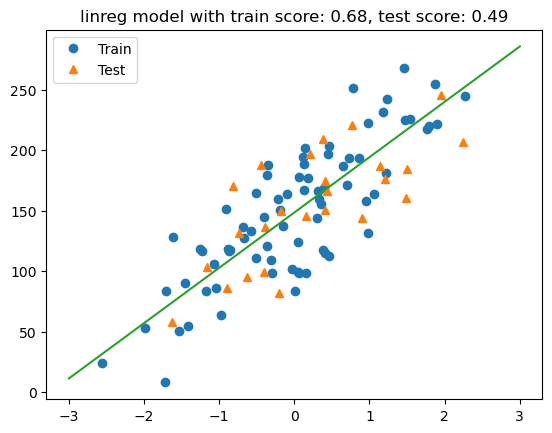

In [18]:
plt.figure()
plt.plot(X_train, y_train, 'o', label='Train')
plt.plot(X_test, y_test, '^', label='Test')
plt.plot(X_predict, y_predict)
plt.title('linreg model with train score: {:.2f}, test score: {:.2f}'.format(train_score, test_score))
plt.legend()
plt.show()

## Ridge Regression

In [19]:
# Fit the scaler with test data can lead to data leakage problem. So, the scaler should fitted with the trian data.

In [20]:
df = pd.read_csv('aut.csv', index_col=0).dropna()
Xa = df[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'highway-mpg']]
ya = df['price']
Xa

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,highway-mpg
4,99.4,176.6,66.4,2824,136,3.19,115.0,22
5,99.8,177.3,66.3,2507,136,3.19,110.0,25
6,105.8,192.7,71.4,2844,136,3.19,110.0,25
7,105.8,192.7,71.4,2954,136,3.19,110.0,25
8,105.8,192.7,71.4,3086,131,3.13,140.0,20
...,...,...,...,...,...,...,...,...
196,109.1,188.8,68.9,2952,141,3.78,114.0,28
197,109.1,188.8,68.8,3049,141,3.78,160.0,25
198,109.1,188.8,68.9,3012,173,3.58,134.0,23
199,109.1,188.8,68.9,3217,145,3.01,106.0,27


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
scaler = MinMaxScaler()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(Xa, ya, random_state=0)
#scaler = scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20).fit(X_train, y_train)
linridge_scaled = Ridge(alpha=20).fit(X_train_scaled, y_train)
print('linridge train score: {:.2f}, test score: {:.2f}'
      .format(linridge.score(X_train, y_train), linridge.score(X_test, y_test)))
print('linridge scaled train score: {:.2f}, test score: {:.2f}'
      .format(linridge_scaled.score(X_train_scaled, y_train), linridge_scaled.score(X_test_scaled, y_test)))
print('Number of Zero features: {}'.format(np.sum(linridge_scaled.coef_ == 0)))

linridge train score: 0.82, test score: 0.78
linridge scaled train score: 0.62, test score: 0.64
Number of Zero features: 0


#### In this dataset the scaled features are worse than the regular one, but sometimes scaling is a better way. alpha variable is determine how the weights should make penalty on model. when it is zero actually is the same as linreg

## Lasso Regression
#### In general lasso regression is helpful if there are only a few variables that have a medium or large effect on the output variable. Otherwise, if there are lots of variables that contribute small or medium effects, ridge regression is typically the better choice.

In [23]:
from sklearn.linear_model import Lasso

In [24]:
linlasso = Lasso(alpha=2, max_iter=10000).fit(X_train, y_train)
linlasso_s = Lasso(alpha=2, max_iter=10000).fit(X_train_scaled, y_train)
print('linlasso train score: {:.4f}, test score: {:.4f}'
      .format(linlasso.score(X_train, y_train), linlasso.score(X_test, y_test)))
print('linlasso scaled train score: {:.4f}, test score: {:.4f}'
      .format(linlasso_s.score(X_train_scaled, y_train), linlasso_s.score(X_test_scaled, y_test)))
print('Number of Zero features: {}'.format(np.sum(linlasso_s.coef_ == 0)))

linlasso train score: 0.8248, test score: 0.7830
linlasso scaled train score: 0.8247, test score: 0.7801
Number of Zero features: 1


In [25]:
linlasso.coef_

array([ 20.64407482, -38.96726171, 507.52274657,   2.11819305,
        88.38237051,  -0.        ,  59.93523734,  17.76944033])

In [26]:
linridge.coef_

array([ 27.62907318, -35.7504259 , 437.10667709,   2.17431088,
        88.93042597, -11.77022463,  60.0817228 ,  16.73737912])

## Polynomial Regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly = PolynomialFeatures(degree=2)     # Degree = 1 returnes previous results
X_poly = poly.fit_transform(Xa)
X_train, X_test, y_train, y_test = train_test_split(X_poly, ya, random_state=0)

linreg_p = LinearRegression().fit(X_train, y_train)
linridge_p = Ridge(alpha=20).fit(X_train, y_train)

print('linreg score: train = {}, test = {}'.format(linreg_p.score(X_train, y_train), linreg_p.score(X_test, y_test)))
print('linridge score: train = {}, test = {}'.format(linridge_p.score(X_train, y_train), linridge_p.score(X_test, y_test)))

linreg score: train = 0.9249001773810819, test = 0.5746371772157501
linridge score: train = 0.9368986023970723, test = 0.8020006498702275
